

# 01. Read BIDS datasets

When working with electrophysiological data in the BIDS format, an important
resource is the [OpenNeuro](https://openneuro.org/) database. OpenNeuro
works great with MNE-BIDS because every dataset must pass a validator
that tests to ensure its format meets BIDS specifications before the dataset
can be uploaded, so you know the data will work with a script like in this
example without modification.

We have various data types that can be loaded via the ``read_raw_bids``
function:

- MEG
- EEG (scalp electrodes)
- iEEG (ECoG and SEEG)
- the anatomical MRI scan of a study participant

In this tutorial, we show how ``read_raw_bids`` can be used to load and
inspect BIDS-formatted data.


In [1]:
!pip install openneuro-py

In [2]:
# Authors: Adam Li <adam2392@gmail.com>
#          Richard Höchenberger <richard.hoechenberger@gmail.com>
#          Alex Rockhill <aprockhill@mailbox.org>
#
# License: BSD-3-Clause

## Imports
We are importing everything we need for this example:



In [3]:
import os
import os.path as op
import openneuro

from mne.datasets import sample
from mne_bids import (
    BIDSPath,
    read_raw_bids,
    print_dir_tree,
    make_report,
    find_matching_paths,
    get_entity_vals,
)

## Download a subject's data from an OpenNeuro BIDS dataset

Download the data, storing each in a ``target_dir`` target directory, which,
in ``mne-bids`` terminology, is the `root` of each BIDS dataset. This example
uses this [EEG dataset](https://openneuro.org/datasets/ds002778) of
resting-state recordings of patients with Parkinson's disease.




In [4]:
# .. note: If the keyword argument include is left out of
#          ``openneuro.download``, the whole dataset will be downloaded.
#          We're just using data from one subject to reduce the time
#          it takes to run the example.

dataset = "ds002778"
subject = "pd6"

# Download one subject's data from each dataset
bids_root = op.join(op.dirname(sample.data_path()), dataset)
if not op.isdir(bids_root):
    os.makedirs(bids_root)

openneuro.download(dataset=dataset, target_dir=bids_root, include=[f"sub-{subject}"])


👋 Hello! This is openneuro-py 2023.1.0. Great to see you! 🤗

   👉 Please report problems 🤯 and bugs 🪲 at
      https://github.com/hoechenberger/openneuro-py/issues

🌍 Preparing to download ds002778 …


📁 Traversing directories for ds002778 : 0 entities [00:00, ? entities/s]

📥 Retrieving up to 19 files (5 concurrent downloads). 
✅ Finished downloading ds002778.
 
🧠 Please enjoy your brains.
 


## Explore the dataset contents

We can use MNE-BIDS to print a tree of all
included files and folders. We pass the ``max_depth`` parameter to
`mne_bids.print_dir_tree` to the output to four levels of folders, for
better readability in this example.



In [5]:
print_dir_tree(bids_root, max_depth=4)

|ds002778\
|--- CHANGES
|--- README
|--- dataset_description.json
|--- participants.json
|--- participants.tsv
|--- sub-pd6\
|------ ses-off\
|--------- sub-pd6_ses-off_scans.tsv
|--------- beh\
|------------ sub-pd6_ses-off_task-rest_beh.json
|------------ sub-pd6_ses-off_task-rest_beh.tsv
|--------- eeg\
|------------ sub-pd6_ses-off_task-rest_channels.tsv
|------------ sub-pd6_ses-off_task-rest_eeg.bdf
|------------ sub-pd6_ses-off_task-rest_eeg.json
|------------ sub-pd6_ses-off_task-rest_events.tsv
|------ ses-on\
|--------- sub-pd6_ses-on_scans.tsv
|--------- beh\
|------------ sub-pd6_ses-on_task-rest_beh.json
|------------ sub-pd6_ses-on_task-rest_beh.tsv
|--------- eeg\
|------------ sub-pd6_ses-on_task-rest_channels.tsv
|------------ sub-pd6_ses-on_task-rest_eeg.bdf
|------------ sub-pd6_ses-on_task-rest_eeg.json
|------------ sub-pd6_ses-on_task-rest_events.tsv


We can even ask MNE-BIDS to produce a human-readbale summary report
on the dataset contents.



In [6]:
print(make_report(bids_root))

Summarizing participants.tsv C:\Users\SPierre-Eloy\mne_data\ds002778\participants.tsv...
Summarizing scans.tsv files [WindowsPath('C:/Users/SPierre-Eloy/mne_data/ds002778/sub-pd6/ses-off/sub-pd6_ses-off_scans.tsv'), WindowsPath('C:/Users/SPierre-Eloy/mne_data/ds002778/sub-pd6/ses-on/sub-pd6_ses-on_scans.tsv')]...
The participant template found: comprised of 14 male and 17 female participants;
comprised of 31 right hand, 0 left hand and 0 ambidextrous;
ages ranged from 47.0 to 82.0 (mean = 63.39, std = 8.69)
 The UC San Diego Resting State EEG Data from Patients with Parkinson's Disease
dataset was created by Alexander P. Rockhill, Nicko Jackson, Jobi George, Adam
Aron, and Nicole C. Swann and conforms to BIDS version 1.2.2. This report was
generated with MNE-BIDS (https://doi.org/10.21105/joss.01896). The dataset
consists of 1 participants (comprised of 14 male and 17 female participants;
comprised of 31 right hand, 0 left hand and 0 ambidextrous; ages ranged from
47.0 to 82.0 (mean = 

Now it's time to get ready for reading some of the data! First, we need to
create an :class:`mne_bids.BIDSPath`, which is the workhorse object of
MNE-BIDS when it comes to file and folder operations.

For now, we're interested only in the EEG data in the BIDS root directory
of the Parkinson's disease patient dataset. There were two sessions, one
where the patients took their regular anti-Parkinsonian medications and
one where they abstained for more than twelve hours. For now, we are
not interested in the on-medication session.



In [7]:
sessions = get_entity_vals(bids_root, "session", ignore_sessions="on")
datatype = "eeg"
extensions = [".bdf", ".tsv"]  # ignore .json files
bids_paths = find_matching_paths(
    bids_root, datatypes=datatype, sessions=sessions, extensions=extensions
)

We can now retrieve a list of all MEG-related files in the dataset:



In [8]:
print(bids_paths)

[BIDSPath(
root: C:/Users/SPierre-Eloy/mne_data/ds002778
datatype: eeg
basename: sub-pd6_ses-off_task-rest_channels.tsv), BIDSPath(
root: C:/Users/SPierre-Eloy/mne_data/ds002778
datatype: eeg
basename: sub-pd6_ses-off_task-rest_eeg.bdf), BIDSPath(
root: C:/Users/SPierre-Eloy/mne_data/ds002778
datatype: eeg
basename: sub-pd6_ses-off_task-rest_events.tsv)]


Note that this is the same as running:



In [9]:
session = "off"
bids_path = BIDSPath(root=bids_root, session=session, datatype=datatype)
print(bids_path.match(ignore_json=True))

[BIDSPath(
root: C:/Users/SPierre-Eloy/mne_data/ds002778
datatype: eeg
basename: sub-pd6_ses-off_task-rest_channels.tsv), BIDSPath(
root: C:/Users/SPierre-Eloy/mne_data/ds002778
datatype: eeg
basename: sub-pd6_ses-off_task-rest_eeg.bdf), BIDSPath(
root: C:/Users/SPierre-Eloy/mne_data/ds002778
datatype: eeg
basename: sub-pd6_ses-off_task-rest_events.tsv)]


The returned list contains ``BIDSpaths`` of 3 files:
``sub-pd6_ses-off_task-rest_channels.tsv``,
``sub-pd6_ses-off_task-rest_events.tsv``, and
``sub-pd6_ses-off_task-rest_eeg.bdf``.
The first two are so-called sidecar files that contain information on the
recording channels and experimental events, and the third one is the actual
data file.

## Prepare reading the data

There is only one subject and one experimental task (``rest``).
Let's use this knowledge to create a new ``BIDSPath`` with
all the information required to actually read the EEG data. We also need to
pass a ``suffix``, which is the last part of the filename just before the
extension -- ``'channels'`` and ``'events'`` for the two TSV files in
our example, and ``'eeg'`` for EEG raw data. For MEG and EEG raw data, the
suffix is identical to the datatype, so don't let yourself be confused here!



In [10]:
task = "rest"
suffix = "eeg"

bids_path = bids_path.update(subject=subject, task=task, suffix=suffix)

Now let's print the contents of ``bids_path``.



In [11]:
print(bids_path)

C:/Users/SPierre-Eloy/mne_data/ds002778/sub-pd6/ses-off/eeg/sub-pd6_ses-off_task-rest_eeg.bdf


You probably noticed two things: Firstly, this looks like an ordinary string
now, not like the more-or-less neatly formatted output we saw before. And
secondly, that there's suddenly a filename extension which we never specified
anywhere!

The reason is that when you call ``print(bids_path)``, ``BIDSPath`` returns
a string representation of ``BIDSPath.fpath``, which looks different. If,
instead, you simply typed ``bids_path`` (or ``print(repr(bids_path))``, which
is the same) into your Python console, you would get the nicely formatted
output:



In [12]:
bids_path

BIDSPath(
root: C:/Users/SPierre-Eloy/mne_data/ds002778
datatype: eeg
basename: sub-pd6_ses-off_task-rest_eeg)

The ``root`` here is – you guessed it – the directory we passed via the
``root`` parameter: the "home" of our BIDS dataset. The ``datatype``, again,
is self-explanatory. The ``basename``, on the other hand, is created
automatically based on the suffix and **BIDS entities**  we passed to
``BIDSPath``: in our case, ``subject``, ``session`` and ``task``.

<div class="alert alert-info"><h4>Note</h4><p>There are many more supported entities, the most-commonly used among them
  probably being ``acquisition``. Please see
  `our introduction to BIDSPath <bidspath-example>` to learn more
  about entities, ``basename``, and ``BIDSPath`` in general.</p></div>

But what about that filename extension, now? ``BIDSPath.fpath``, which –
as you hopefully remember – is invoked when you run ``print(bids_path)`` –
employs some heuristics to auto-detect some missing filename components.
Omitting the filename extension in your script can make your code
more portable. Note that, however, you **can** explicitly specify an
extension too, by passing e.g. ``extension='.bdf'`` to ``BIDSPath``.



## Read the data

Let's read the data! It's just a single line of code.



In [13]:
raw = read_raw_bids(bids_path=bids_path, verbose=False)

<ipython-input-13-1d75f85e4f8b>:1: RuntimeWarning: The unit for channel(s) Status has changed from NA to V.
  raw = read_raw_bids(bids_path=bids_path, verbose=False)


Now we can inspect the ``raw`` object to check that it contains to correct
metadata.

Basic subject metadata is here.



In [14]:
print(raw.info["subject_info"])

{'his_id': 'sub-pd6', 'age': '62', 'gender': 'f', 'hand': 1, 'MMSE': '30', 'NAART': '42', 'disease_duration': '8', 'rl_deficits': 'L OFF meds, more R ON meds', 'notes': 'Used preprocessed data from EEGLAB .mat file instead of raw data for pd on'}


Power line frequency is here.



In [15]:
print(raw.info["line_freq"])

60.0


Sampling frequency is here.



In [16]:
print(raw.info["sfreq"])

512.0


Events are now Annotations



In [17]:
print(raw.annotations)

<Annotations | 2 segments: 1 (1), 65536 (1)>


Plot the raw data.



Using matplotlib as 2D backend.


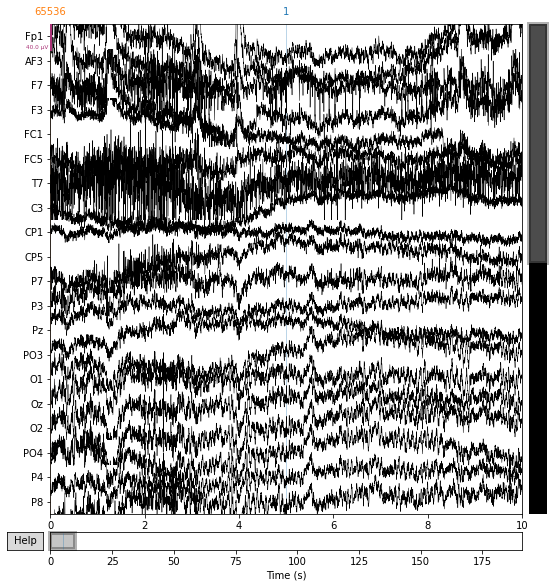

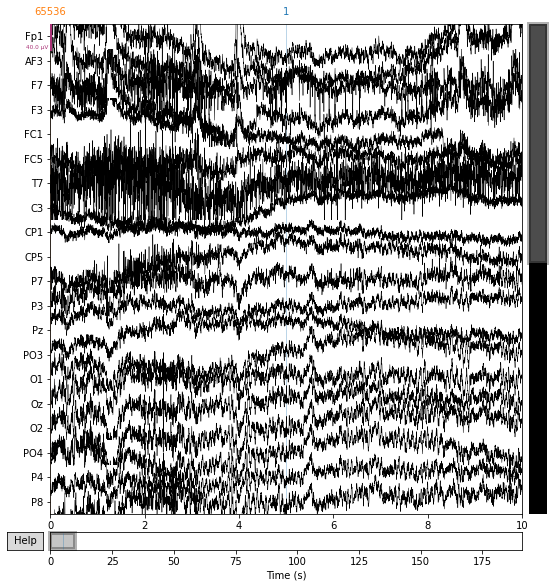

Re-downloading dataset_description.json: file size mismatch.: 0.00B [00:00, ?B/s]

Re-downloading CHANGES: file size mismatch.: 0.00B [00:00, ?B/s]

Re-downloading README: file size mismatch.: 0.00B [00:00, ?B/s]

Skipping participants.tsv: already downloaded.: 100%|##########| 1.62k/1.62k [00:00<?, ?B/s]

Skipping participants.json: already downloaded.: 100%|##########| 1.24k/1.24k [00:00<?, ?B/s]

Skipping sub-pd6_ses-off_task-rest_eeg.json: already downloaded.: 100%|##########| 471/471 [00:00<?, ?B/s]

Skipping sub-pd6_ses-off_task-rest_channels.tsv: already downloaded.: 100%|##########| 2.22k/2.22k [00:00<?, ?…

Skipping sub-pd6_ses-off_task-rest_events.tsv: already downloaded.: 100%|##########| 66.0/66.0 [00:00<?, ?B/s]

Skipping sub-pd6_ses-on_scans.tsv: already downloaded.: 100%|##########| 74.0/74.0 [00:00<?, ?B/s]

Skipping sub-pd6_ses-off_task-rest_eeg.bdf: already downloaded.: 100%|##########| 11.5M/11.5M [00:00<?, ?B/s]

Skipping sub-pd6_ses-on_task-rest_beh.json: already downloaded.: 100%|##########| 433/433 [00:00<?, ?B/s]

Skipping sub-pd6_ses-on_task-rest_channels.tsv: already downloaded.: 100%|##########| 2.22k/2.22k [00:00<?, ?B…

Skipping sub-pd6_ses-on_task-rest_beh.tsv: already downloaded.: 100%|##########| 10.0/10.0 [00:00<?, ?B/s]

Skipping sub-pd6_ses-on_task-rest_eeg.json: already downloaded.: 100%|##########| 471/471 [00:00<?, ?B/s]

Skipping sub-pd6_ses-on_task-rest_eeg.bdf: already downloaded.: 100%|##########| 17.4M/17.4M [00:00<?, ?B/s]

Skipping sub-pd6_ses-on_task-rest_events.tsv: already downloaded.: 100%|##########| 51.0/51.0 [00:00<?, ?B/s]

Re-downloading sub-pd6_ses-off_task-rest_beh.json: file size mismatch.: 0.00B [00:00, ?B/s]

Skipping sub-pd6_ses-off_scans.tsv: already downloaded.: 100%|##########| 75.0/75.0 [00:00<?, ?B/s]

Skipping sub-pd6_ses-off_task-rest_beh.tsv: already downloaded.: 100%|##########| 10.0/10.0 [00:00<?, ?B/s]

In [18]:
raw.plot()

.. LINKS

   https://openneuro.org/datasets/ds002778


